<a href="https://colab.research.google.com/github/Laura9704/ACD_2025/blob/main/Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import make_scorer,f1_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.simplefilter("ignore")

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
#info del punto 2 clasificacion
data1 = pd.read_excel('/content/drive/MyDrive/BD_IPSA_1940.xlsx')

In [38]:
data1

,Unnamed: 0,NOME,FAZ,TAL,tipocorte,variedad,madurada,producto,dosismad,semsmad,...,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea
0,11,AMAIME SILCA,81291,40,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,8.3,...,4,12.7,2.4,14.0,12,202012,112,137,3,6.2
1,12,AMAIME SILCA,81291,41,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,6.3,...,2,7.8,2.3,13.0,3,201903,157,0,3,3.5
2,13,AMAIME SILCA,81291,41,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.6,7.9,...,3,8.8,1.8,13.3,3,202003,167,68,3,4.3
3,15,AMAIME SILCA,81291,43,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,6.6,...,1,6.1,2.5,13.4,3,201903,156,0,3,3.5
4,16,AMAIME SILCA,81291,43,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.6,8.1,...,2,7.9,2.1,14.0,3,202003,151,68,3,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,4216,ZABALETAS CORPORACION,80123,544B,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,1.3,5.6,...,3,8.5,1.8,13.5,3,201903,63,99,1,4.3
2183,4217,ZABALETAS CORPORACION,80123,545A,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,1.2,9.1,...,1,9.7,3.6,13.0,12,201912,126,448,1,3.1
2184,4218,ZABALETAS EMPRESA,82503,6,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,1.2,7.1,...,1,8.8,2.0,12.9,4,201904,173,122,1,2.2
2185,4219,ZABALETAS EMPRESA,82503,6,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,1.0,6.9,...,2,8.4,2.2,13.5,4,202004,134,73,1,3.1


#Analisis de las variables independientes

In [39]:
data1.describe()

,Unnamed: 0,FAZ,dosismad,semsmad,edad,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea
count,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,2126.506630,80588.332876,0.993278,9.164838,12.766118,2.794239,9.197759,4.172154,12.777732,6.758573,201887.691358,142.393233,118.051212,2.435299,4.317284
std,1228.561661,572.818299,0.309096,3.441579,1.117866,1.621195,1.574409,6.339255,0.854397,3.482444,131.982686,25.838029,144.424675,0.704058,2.591956
min,11.000000,80100.000000,0.000000,-1.600000,10.300000,1.000000,3.400000,0.200000,9.200000,1.000000,201407.000000,6.000000,0.000000,1.000000,0.200000
25%,1038.000000,80222.000000,0.800000,7.100000,12.000000,1.000000,8.200000,2.100000,12.200000,4.000000,201807.000000,126.000000,0.000000,2.000000,2.900000
50%,2219.000000,80396.000000,1.000000,8.700000,12.500000,2.000000,9.100000,2.600000,12.800000,7.000000,201908.000000,144.000000,77.000000,3.000000,3.700000
75%,3223.500000,80660.000000,1.200000,10.600000,13.300000,4.000000,10.100000,3.300000,13.300000,10.000000,202005.000000,159.000000,171.500000,3.000000,5.000000
max,4222.000000,82519.000000,9.000000,45.000000,21.100000,14.000000,15.000000,102.900000,16.000000,12.000000,202101.000000,249.000000,1468.000000,3.000000,25.500000


In [40]:
data1.describe(include='object')

,NOME,TAL,tipocorte,variedad,madurada,producto
count,2187,2187,2187,2187,2187,2187
unique,285,273,1,1,1,1
top,SAN MIGUEL CARVAJAL,1,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO
freq,101,258,2187,2187,2187,2187


In [41]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2187 non-null   int64  
 1   NOME            2187 non-null   object 
 2   FAZ             2187 non-null   int64  
 3   TAL             2187 non-null   object 
 4   tipocorte       2187 non-null   object 
 5   variedad        2187 non-null   object 
 6   madurada        2187 non-null   object 
 7   producto        2187 non-null   object 
 8   dosismad        2187 non-null   float64
 9   semsmad         2187 non-null   float64
 10  edad            2187 non-null   float64
 11  cortes          2187 non-null   int64  
 12  me              2187 non-null   float64
 13  vejez           2187 non-null   float64
 14  sacarosa        2187 non-null   float64
 15  mes             2187 non-null   int64  
 16  periodo         2187 non-null   int64  
 17  TCH             2187 non-null   i

In [42]:
X = data1.drop(columns=['sacarosa', 'TCH','tipocorte','variedad','madurada','producto','Unnamed: 0','NOME',	'FAZ','TAL','tipocorte'])


Se descartan las variables para el modelo porque...

- Se recomienda usar NOME solo para diferenciar las observaciones, reduce a 285 clases de identificación de la observación y . Si consideramos los 3 identificadores NOME_FAZ_TAL, tendriamos 1115 clases de identificación. Pero dada la cantidad de valores únicos que tiene NOME y los demás identificadores (FAZ y TAL), puede hacer más complejo y generar errores en el modelo. Además no hay una relación clara, ni se nota una diferencia drastica entre la unidad de análisis y TCH, preferible no incluir en el modelo
- Se descarta la variable desconocida, no se evidencia alguna relación con TCH
- Se descarta tipocorte porque no hay diferencia por tipo de corte, sólo hay un tipo
- Se descarta variedad porque sólo hay 1 tipo de variedad, no genera diferenciación
- Se descarta las variables que tiene una solo tipo de registro ya que su clasificacion es una solo,ademas se deberia suponer que no hay error en los datos cargados en los registos
- se entiende que no hay datos nulos,,en base a la informacion del dataset

In [43]:
X

,dosismad,semsmad,edad,cortes,me,vejez,mes,periodo,lluvias,grupo_tenencia,pct_diatrea
0,0.8,8.3,12.3,4,12.7,2.4,12,202012,137,3,6.2
1,0.8,6.3,11.2,2,7.8,2.3,3,201903,0,3,3.5
2,0.6,7.9,12.2,3,8.8,1.8,3,202003,68,3,4.3
3,0.8,6.6,13.1,1,6.1,2.5,3,201903,0,3,3.5
4,0.6,8.1,12.2,2,7.9,2.1,3,202003,68,3,4.3
...,...,...,...,...,...,...,...,...,...,...,...
2182,1.3,5.6,11.5,3,8.5,1.8,3,201903,99,1,4.3
2183,1.2,9.1,13.3,1,9.7,3.6,12,201912,448,1,3.1
2184,1.2,7.1,12.6,1,8.8,2.0,4,201904,122,1,2.2
2185,1.0,6.9,12.0,2,8.4,2.2,4,202004,73,1,3.1


In [44]:
zero_counts = (X == 0).sum()
zero_counts

,0
dosismad,1
semsmad,0
edad,0
cortes,0
me,0
vejez,0
mes,0
periodo,0
lluvias,685
grupo_tenencia,0


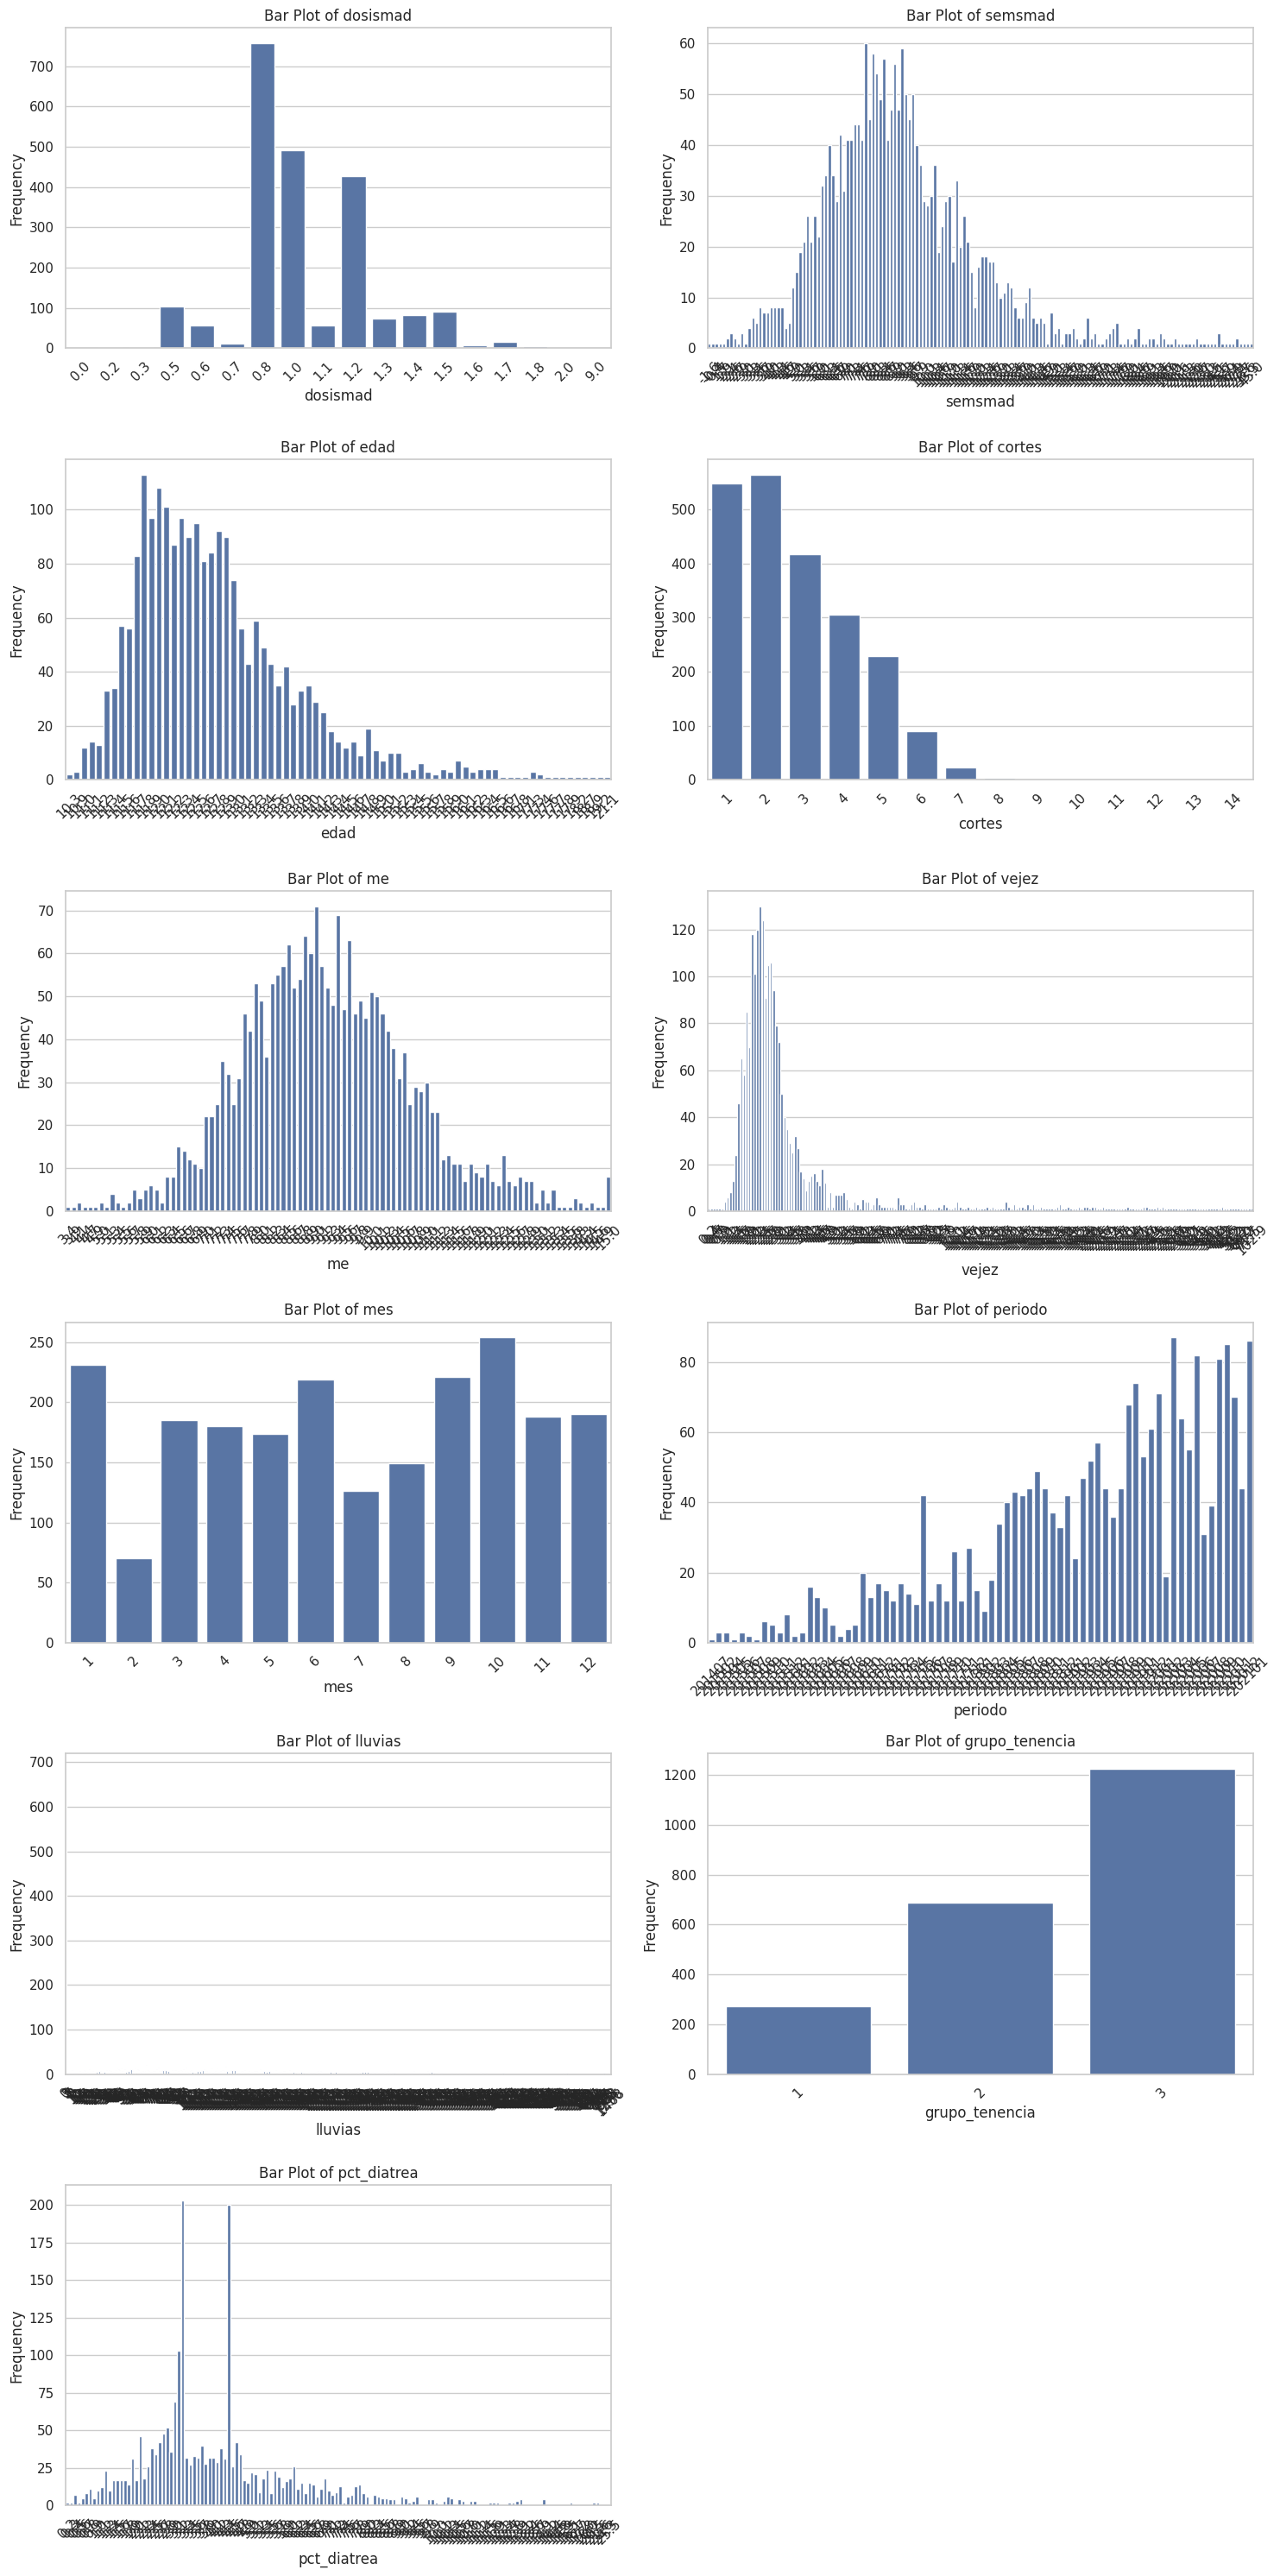

In [45]:
numerical_features = X.select_dtypes(include=np.number).columns

# Calculate number of rows and columns for subplots
n_cols = 2
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Iterate through numerical features and create bar plots
for i, col in enumerate(numerical_features):
    ax = axes[i]
    try:  # Handle potential errors during plotting
        sns.barplot(x=X[col].value_counts().index, y=X[col].value_counts().values, ax=ax)
        ax.set_title(f'Bar Plot of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability
    except Exception as e:
        print(f"Error plotting {col}: {e}")
        ax.set_title(f"Error plotting {col}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


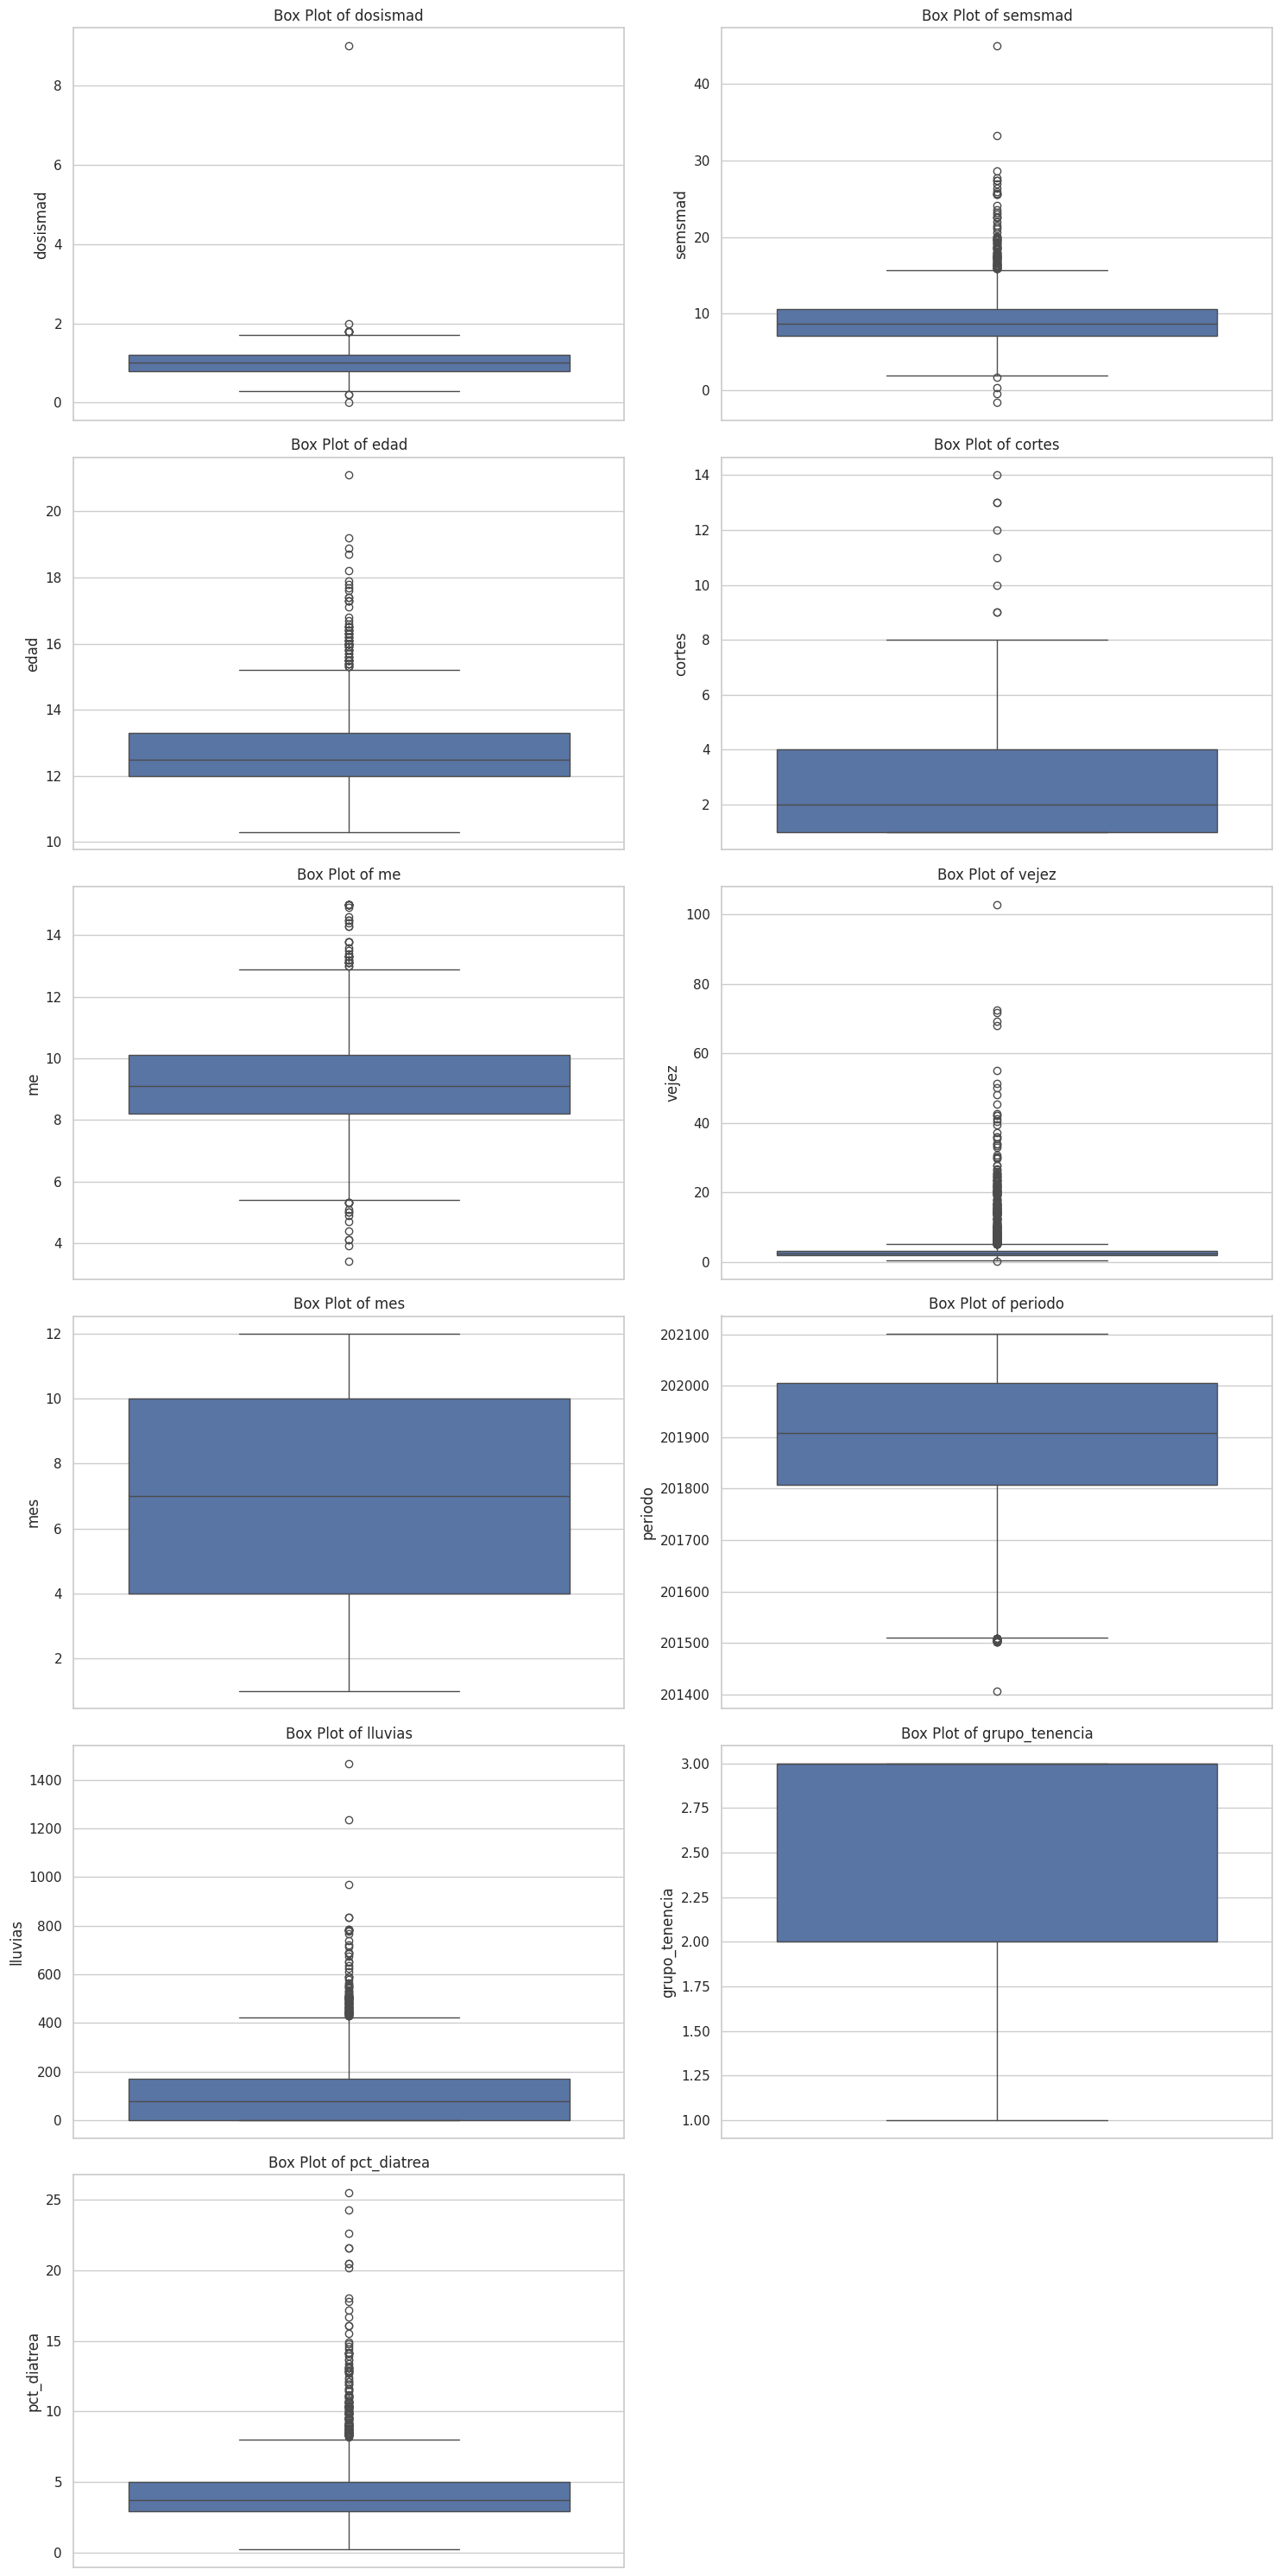

In [46]:
n_cols = 2
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Iterate through numerical features and create boxplots
for i, col in enumerate(numerical_features):
    ax = axes[i]
    try:  # Handle potential errors during plotting
        sns.boxplot(y=X[col], ax=ax)
        ax.set_title(f'Box Plot of {col}')
        ax.set_ylabel(col)
    except Exception as e:
        print(f"Error plotting {col}: {e}")
        ax.set_title(f"Error plotting {col}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

A partir de los gráficos, se observa la presencia de múltiples datos atípicos, tanto valores extremos altos como mínimos en 0. Es importante considerar que, en algunos casos, estos valores pueden estar relacionados con la naturaleza de las variables analizadas. Algunos ejemplos incluyen:

- TCH: Presenta outliers en ambos extremos, lo que indica una alta variabilidad en la producción. Es fundamental evaluar si estas diferencias están asociadas a factores ambientales o de manejo agrícola. Ademas El TCH ha tendido a disminuir con los años.

- Lluvias: Se observan valores extremos, especialmente en la parte superior, lo que podría estar relacionado con zonas con condiciones climáticas muy distintas.

- pct_diatrea: Muestra varios outliers en los valores superiores, lo que sugiere que, en ciertas áreas, la plaga afecta la producción de manera desproporcionada.

- DosisMad: Los datos se concentran en el rango de 0 a 2, con una distribución equilibrada en torno a la media. Sin embargo, la presencia de diversos picos sugiere que ciertos valores específicos podrían ser más utilizados en la aplicación de fertilizantes.

- SemsMad: Presenta un sesgo a la derecha, aunque gráficamente es difícil de precisar. El boxplot indica una alta presencia de valores atípicos. Su distribución muestra una mayor frecuencia en el rango de 5 a 15, con valores que llegan hasta 40, lo que podría sugerir la existencia de casos con dosis excepcionalmente altas.

- Edad: Se observa una alta concentración de cultivos con una edad de 12 meses, siendo este el pico más alto en la distribución. También se identifican valores frecuentes entre los 10 y 14 meses. La presencia de valores atípicos por encima del límite superior sugiere la existencia de cultivos más longevos, que podrían ser menos comunes.

In [47]:
X

,dosismad,semsmad,edad,cortes,me,vejez,mes,periodo,lluvias,grupo_tenencia,pct_diatrea
0,0.8,8.3,12.3,4,12.7,2.4,12,202012,137,3,6.2
1,0.8,6.3,11.2,2,7.8,2.3,3,201903,0,3,3.5
2,0.6,7.9,12.2,3,8.8,1.8,3,202003,68,3,4.3
3,0.8,6.6,13.1,1,6.1,2.5,3,201903,0,3,3.5
4,0.6,8.1,12.2,2,7.9,2.1,3,202003,68,3,4.3
...,...,...,...,...,...,...,...,...,...,...,...
2182,1.3,5.6,11.5,3,8.5,1.8,3,201903,99,1,4.3
2183,1.2,9.1,13.3,1,9.7,3.6,12,201912,448,1,3.1
2184,1.2,7.1,12.6,1,8.8,2.0,4,201904,122,1,2.2
2185,1.0,6.9,12.0,2,8.4,2.2,4,202004,73,1,3.1


In [48]:
y = data1[['sacarosa', 'TCH']]

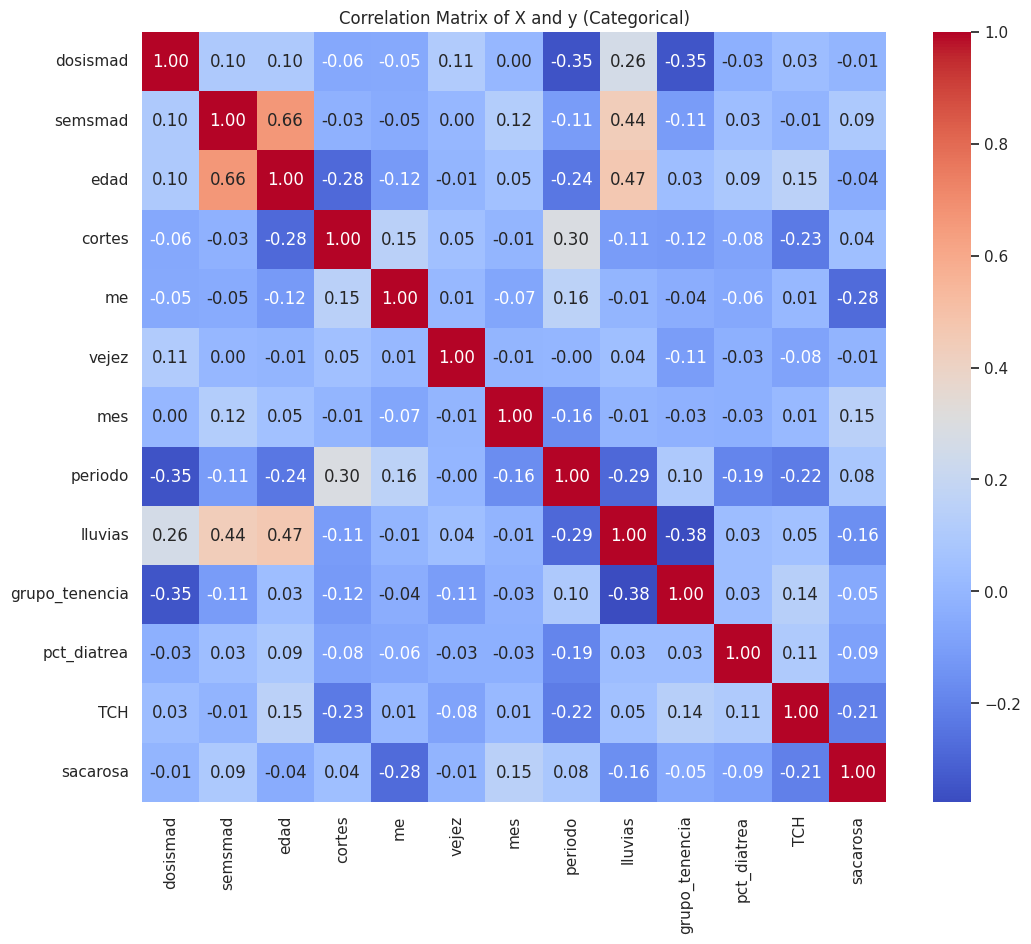

In [49]:
combined_df = pd.concat([X, y[['TCH','sacarosa']]], axis=1)

# Calculate and plot the correlation matrix for the combined DataFrame
correlation_matrix = combined_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of X and y (Categorical)')
plt.show()


en base a los anteriores graficas se considera descarta a **me, mes, año y vejez** como variables no necesarias a implemnetar detro del modelo de clasificacion, ya que presenta una correlacion con las demas varianbles particamente nula.en caso de periodo tiene mas relevancia si en modelos que analsizen las tendencias temporales. aunque pct_diatrea tiene una baja relacion por consideracion al siginifcado de la variable se decide mantener dentro del añalisis-

#Imputacion

In [50]:
# prompt: imputar valores atípicos de X con el metodo IQR

# IQR method for outlier imputation
def impute_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Impute with the lower/upper bound instead of removing the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply IQR imputation to relevant columns in X
for col in numerical_features:
  X = impute_outliers_iqr(X, col)


In [51]:
# prompt: imputar valores atípicos de 'sacarosa' y 'TCH' en y

# Apply IQR imputation to 'sacarosa' and 'TCH' in y
y = impute_outliers_iqr(y, 'sacarosa')
y = impute_outliers_iqr(y, 'TCH')


#Transformacion de Sacarosa y TCH en Alto, Medio y Bajo, Variables Dependientes

In [52]:
y.describe()

,sacarosa,TCH
count,2187.000000,2187.000000
mean,12.779172,142.450389
std,0.836954,25.095143
min,10.550000,76.500000
25%,12.200000,126.000000
50%,12.800000,144.000000
75%,13.300000,159.000000
max,14.950000,208.500000


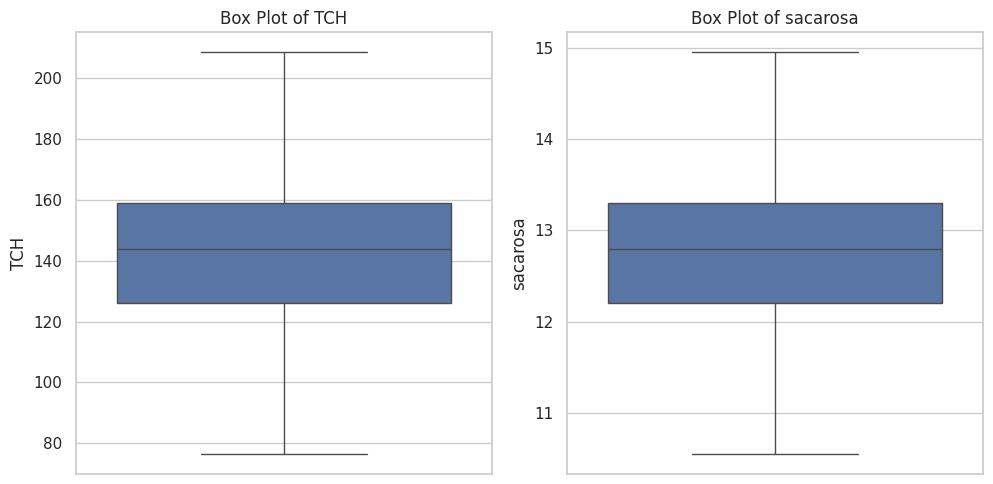

In [53]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=y['TCH'])
plt.title('Box Plot of TCH')
plt.subplot(1, 3, 2)
sns.boxplot(y=y['sacarosa'])
plt.title('Box Plot of sacarosa')
plt.tight_layout()
plt.show()


In [54]:
bins = [y["TCH"].min() - 1, 130, 155, y["TCH"].max()]
labels = ['Bajo', 'Medio', 'Alto']
y['TCH_categoria'] = pd.cut(y['TCH'], bins=bins, labels=labels)

In [55]:
y['TCH_categoria'].value_counts()

,count
TCH_categoria,
Medio,855
Alto,668
Bajo,664


In [56]:
bins2 = [y["sacarosa"].min() - 1, 12.2 ,13 , y["sacarosa"].max()]
y['Sacarosa_C'] = pd.cut(y['sacarosa'], bins=bins2, labels=labels)
yc=y[['TCH_categoria','Sacarosa_C']]

In [57]:
yc['Sacarosa_C'].value_counts()

,count
Sacarosa_C,
Alto,816
Medio,804
Bajo,567


#Base procesada

In [58]:
X2=X.copy()
X2=X2.drop(columns=['me', 'mes', 'vejez', 'periodo'])
X2

,dosismad,semsmad,edad,cortes,lluvias,grupo_tenencia,pct_diatrea
0,0.8,8.3,12.3,4.0,137.00,3.0,6.2
1,0.8,6.3,11.2,2.0,0.00,3.0,3.5
2,0.6,7.9,12.2,3.0,68.00,3.0,4.3
3,0.8,6.6,13.1,1.0,0.00,3.0,3.5
4,0.6,8.1,12.2,2.0,68.00,3.0,4.3
...,...,...,...,...,...,...,...
2182,1.3,5.6,11.5,3.0,99.00,1.0,4.3
2183,1.2,9.1,13.3,1.0,428.75,1.0,3.1
2184,1.2,7.1,12.6,1.0,122.00,1.0,2.2
2185,1.0,6.9,12.0,2.0,73.00,1.0,3.1


#Modelo(s) De Clasificacion

In [59]:
f1_scorer = make_scorer(f1_score, average='weighted')
#Se crean Grupo de Entrenamiento, validacion y Prueba
#Evalaucion Fianl
X_train, X_test, y_train, y_test = train_test_split(X2, yc, test_size=0.3, random_state=42)
#Evaluacion Seleccion de Modelo
X_train2, X_value, y_train2, y_value = train_test_split(X_train,y_train, test_size=0.3, random_state=42)
# Scale the features
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train2)
X_values = scaler.transform(X_value)
#Grupo de Validacion Cruzada


##Regresion Logistica

In [60]:
model = LogisticRegression(solver='liblinear', random_state=0) # Example, adjust parameters
model.fit(X_trains, y_train2['Sacarosa_C'])
Y_pred=model.predict(X_values)
model2 = LogisticRegression(solver='liblinear', random_state=0) # Example, adjust parameters
model2.fit(X_trains, y_train2['TCH_categoria'])
Y_pred2=model2.predict(X_values)

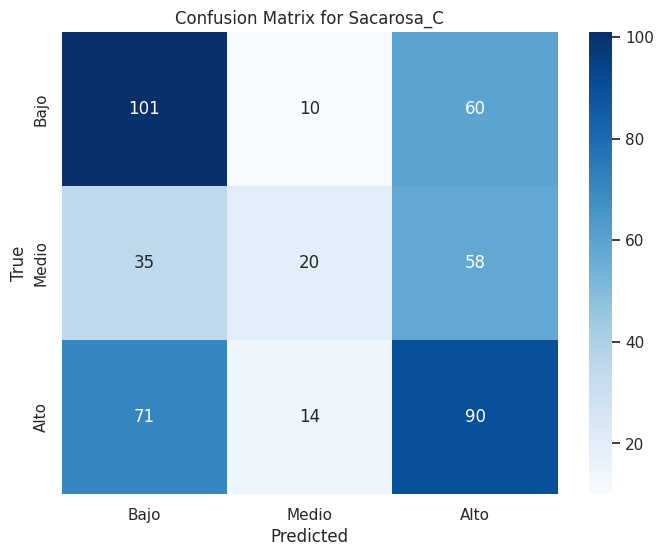

In [61]:
cm = confusion_matrix(y_value['Sacarosa_C'], Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bajo', 'Medio', 'Alto'],
            yticklabels=['Bajo', 'Medio', 'Alto'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Sacarosa_C')
plt.show()


In [62]:
# Evaluar el modelo
accuracy = accuracy_score(y_value['Sacarosa_C'], Y_pred)
report = classification_report(y_value['Sacarosa_C'], Y_pred)
# Mostrar resultados
print(f"Precisión de model: {accuracy:.4f}")
print("Reporte de clasificación:")
print(report)

Precisión del modelo: 0.4597
Reporte de clasificación:
              precision    recall  f1-score   support

        Alto       0.49      0.59      0.53       171
        Bajo       0.45      0.18      0.25       113
       Medio       0.43      0.51      0.47       175

    accuracy                           0.46       459
   macro avg       0.46      0.43      0.42       459
weighted avg       0.46      0.46      0.44       459



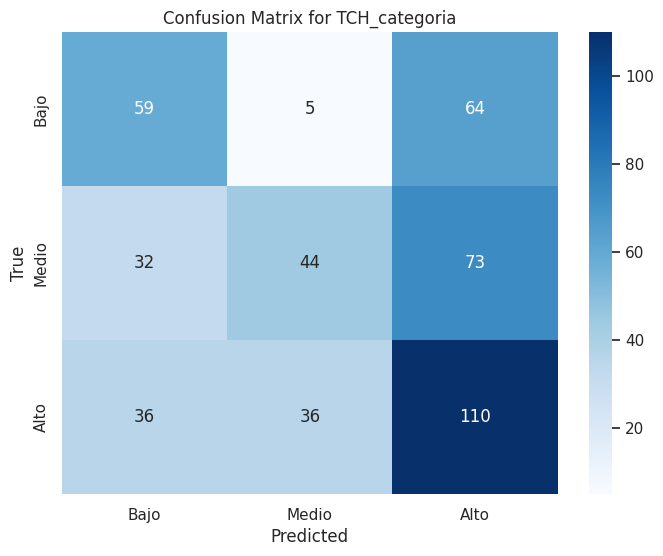

In [63]:
cm = confusion_matrix(y_value['TCH_categoria'], Y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bajo', 'Medio', 'Alto'],
            yticklabels=['Bajo', 'Medio', 'Alto'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for TCH_categoria')
plt.show()

In [64]:
# Evaluar el modelo
accuracy2 = accuracy_score(y_value['TCH_categoria'], Y_pred2)
report2 = classification_report(y_value['TCH_categoria'], Y_pred2)
# Mostrar resultados
print(f"Precisión de model2: {accuracy:.4f}")
print("Reporte de clasificación:")
print(report)

Precisión del modelo: 0.4597
Reporte de clasificación:
              precision    recall  f1-score   support

        Alto       0.49      0.59      0.53       171
        Bajo       0.45      0.18      0.25       113
       Medio       0.43      0.51      0.47       175

    accuracy                           0.46       459
   macro avg       0.46      0.43      0.42       459
weighted avg       0.46      0.46      0.44       459



##Validacion Cruzada

In [65]:
#Validemos con el modelo LogisticRegressionCV, el cual realiza validación cruzada automática ( k-folds), y en este caso, implementamos la regularización lasso también

from sklearn.linear_model import LogisticRegressionCV

# Dividir en conjuntos de entrenamiento y prueba
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X2, yc['TCH_categoria'], test_size=0.3, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled_t = scaler.fit_transform(X_train_t)
X_test_scaled_t = scaler.transform(X_test_t)

# Entrenar el modelo con Lasso (L1)
logreg_lasso_t = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5, random_state=42) # # Validación cruzada con 5 folds
logreg_lasso_t.fit(X_train_scaled_t, y_train_t)

# Hacer predicciones
y_pred_lasso_t = logreg_lasso.predict(X_test_scaled_t)

# Evaluar el modelo
print("Regresión Logística con Lasso - TCH:")
print("Accuracy:", accuracy_score(y_test_t, y_pred_lasso_t))

# Coeficientes diferentes de cero (características seleccionadas)
print("Características seleccionadas por Lasso - TCH:")
print(X2.columns[logreg_lasso_t.coef_[0] != 0])

Regresión Logística con Lasso - TCH:
Accuracy: 0.4687975646879756
Características seleccionadas por Lasso - TCH:
Index(['dosismad', 'semsmad', 'edad', 'cortes', 'lluvias', 'grupo_tenencia'], dtype='object')


In [80]:
# Reporte de clasificación de logreg_lasso_t

accuracy_lasso_t = accuracy_score(y_test_t, y_pred_lasso_t)
report_lasso_t = classification_report(y_test_t, y_pred_lasso_t)

print(f"Precisión del modelo Lasso para TCH: {accuracy_lasso_t:.4f}")
print("Reporte de clasificación Lasso para TCH:")
print(report_lasso_t)

Precisión del modelo Lasso para TCH: 0.4688
Reporte de clasificación Lasso para TCH:
              precision    recall  f1-score   support

        Alto       0.59      0.37      0.46       227
        Bajo       0.50      0.29      0.37       191
       Medio       0.42      0.70      0.52       239

    accuracy                           0.47       657
   macro avg       0.50      0.46      0.45       657
weighted avg       0.50      0.47      0.45       657



In [68]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X2, yc['Sacarosa_C'], test_size=0.3, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled_s = scaler.fit_transform(X_train_s)
X_test_scaled_s = scaler.transform(X_test_s)

# Entrenar el modelo con Lasso (L1)
logreg_lasso_s = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5, random_state=42) # # Validación cruzada con 5 folds
logreg_lasso_s.fit(X_train_scaled_s, y_train_s)

# Hacer predicciones
y_pred_lasso_s = logreg_lasso_s.predict(X_test_scaled_s)

# Evaluar el modelo
print("Regresión Logística con Lasso - Sacarosa:")
print("Accuracy:", accuracy_score(y_test_s, y_pred_lasso_s))

# Coeficientes diferentes de cero (características seleccionadas)
print("Características seleccionadas por Lasso - Sacarosa:")
print(X2.columns[logreg_lasso_s.coef_[0] != 0])

Regresión Logística con Lasso - Sacarosa:
Accuracy: 0.3820395738203957
Características seleccionadas por Lasso - Sacarosa:
Index(['dosismad', 'semsmad', 'edad', 'cortes', 'lluvias', 'grupo_tenencia',
       'pct_diatrea'],
      dtype='object')


In [83]:
# Reporte de clasificación de logreg_lasso_s

accuracy_lasso_s = accuracy_score(y_test_s, y_pred_lasso_s)
report_lasso_s = classification_report(y_test_s, y_pred_lasso_s)

print(f"Precisión del modelo Lasso para Sacarosa: {accuracy_lasso_s:.4f}")
print("Reporte de clasificación Lasso para Sacarosa:")
print(report_lasso_s)


Precisión del modelo Lasso para Sacarosa: 0.3820
Reporte de clasificación Lasso para Sacarosa:
              precision    recall  f1-score   support

        Alto       0.48      0.22      0.30       249
        Bajo       0.78      0.04      0.08       177
       Medio       0.36      0.82      0.50       231

    accuracy                           0.38       657
   macro avg       0.54      0.36      0.29       657
weighted avg       0.52      0.38      0.31       657



##Modelo KNN

KNN Model - Sacarosa_C
Accuracy: 0.2658
Classification Report:
               precision    recall  f1-score   support

        Alto       0.33      0.36      0.35       171
        Bajo       0.22      0.53      0.31       113
       Medio       0.00      0.00      0.00       175

    accuracy                           0.27       459
   macro avg       0.18      0.30      0.22       459
weighted avg       0.18      0.27      0.21       459



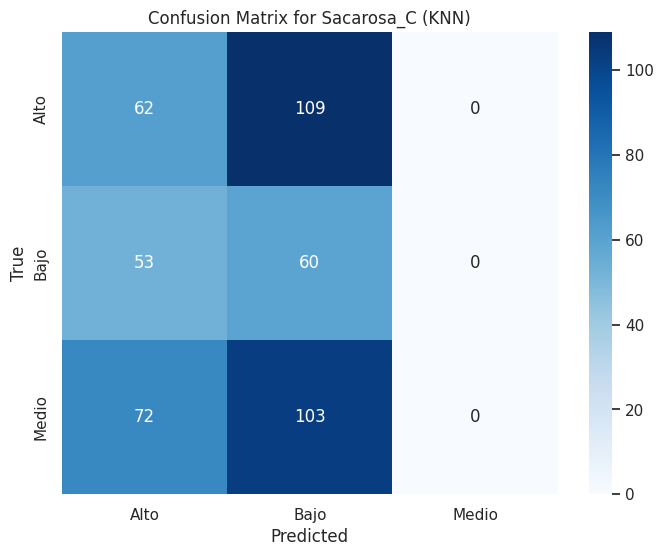


KNN Model - TCH_categoria
Accuracy: 0.3747
Classification Report:
               precision    recall  f1-score   support

        Alto       0.36      0.48      0.41       128
        Bajo       0.35      0.33      0.34       149
       Medio       0.41      0.34      0.37       182

    accuracy                           0.37       459
   macro avg       0.37      0.38      0.37       459
weighted avg       0.38      0.37      0.37       459



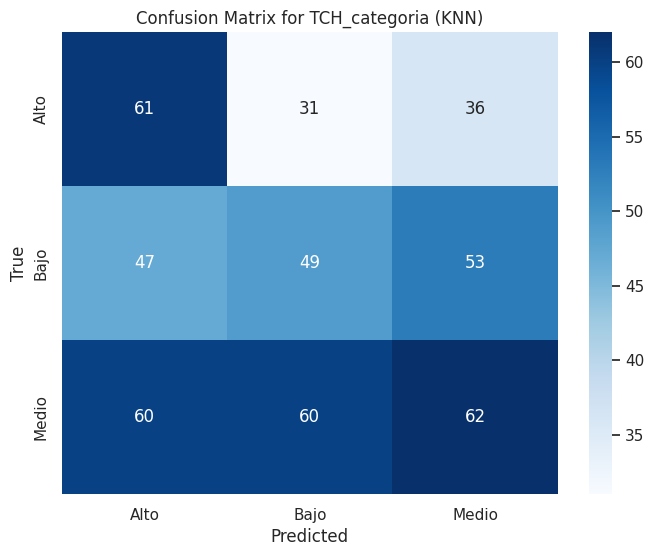

In [70]:
# Definir los modelos KNN por separado para evitar sobreescritura
knn_sacarosa = KNeighborsClassifier(n_neighbors=5)
knn_tch = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo para Sacarosa_C
knn_sacarosa.fit(X_trains, y_train2['Sacarosa_C'])
knn_pred_sacarosa = knn_sacarosa.predict(X_value)

# Evaluar el modelo para Sacarosa_C
knn_accuracy_sacarosa = accuracy_score(y_value['Sacarosa_C'], knn_pred_sacarosa)
knn_report_sacarosa = classification_report(y_value['Sacarosa_C'], knn_pred_sacarosa)

print("KNN Model - Sacarosa_C")
print(f"Accuracy: {knn_accuracy_sacarosa:.4f}")
print("Classification Report:\n", knn_report_sacarosa)

# Matriz de confusión para Sacarosa_C
cm_knn_sacarosa = confusion_matrix(y_value['Sacarosa_C'], knn_pred_sacarosa)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_sacarosa, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_train2['Sacarosa_C']),
            yticklabels=np.unique(y_train2['Sacarosa_C']))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Sacarosa_C (KNN)')
plt.show()

# Entrenar el modelo para TCH_categoria
knn_tch.fit(X_train2, y_train2['TCH_categoria'])
knn_pred_tch = knn_tch.predict(X_value)

# Evaluar el modelo para TCH_categoria
knn_accuracy_tch = accuracy_score(y_value['TCH_categoria'], knn_pred_tch)
knn_report_tch = classification_report(y_value['TCH_categoria'], knn_pred_tch)

print("\nKNN Model - TCH_categoria")
print(f"Accuracy: {knn_accuracy_tch:.4f}")
print("Classification Report:\n", knn_report_tch)

# Matriz de confusión para TCH_categoria
cm_knn_tch = confusion_matrix(y_value['TCH_categoria'], knn_pred_tch)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_tch, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_train2['TCH_categoria']),
            yticklabels=np.unique(y_train2['TCH_categoria']))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for TCH_categoria (KNN)')
plt.show()

# COMPARACION DE CURVA ROC Y AUC DE LOS MODELOS

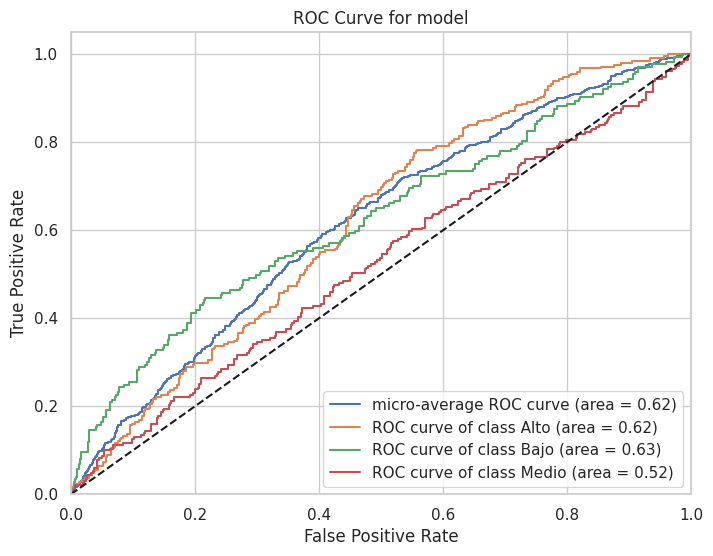

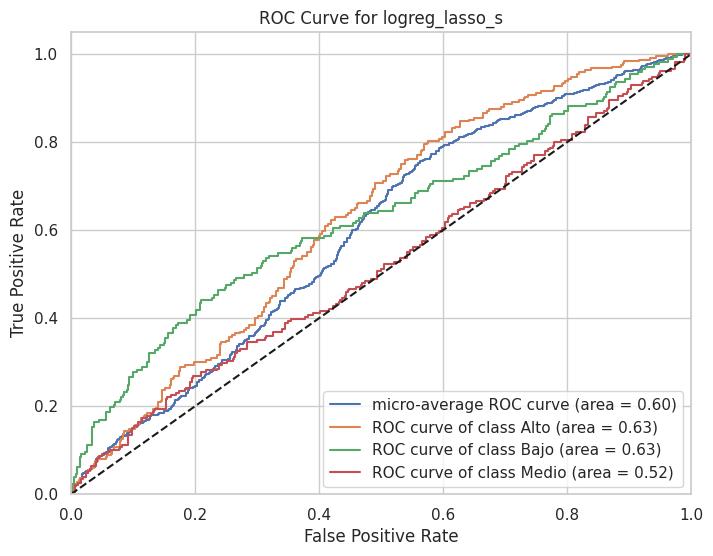

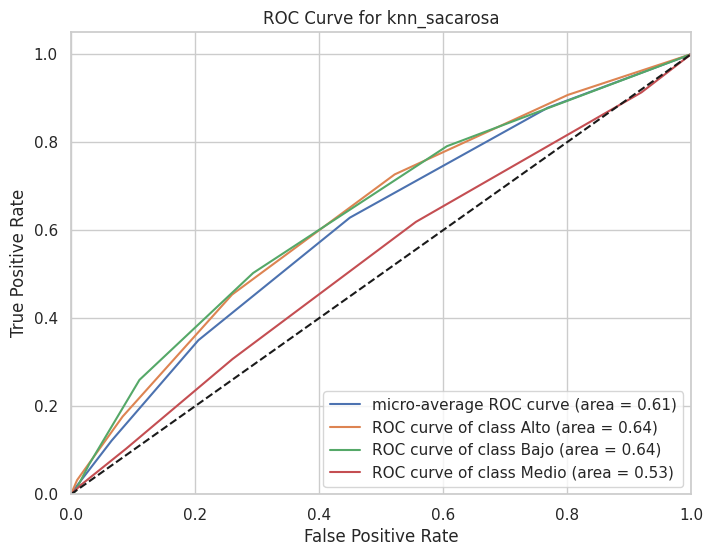

In [77]:
# prompt: curvo roc simple de los tres modelos: model, ogreg_lasso_s, knn_sacarosa

import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already trained your models (model, ogreg_lasso_s, knn_sacarosa)
# and have your X_test and y_test data prepared.

# ... (your existing code for model training)


def plot_roc_curve(model, X_test, y_test, title):
    y_score = model.predict_proba(X_test)

    # Ensure y_test is in the correct format for roc_curve
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

    # Micro-average
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(8, 6))
    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})')

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {np.unique(y_test)[i]} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()


# Prepare your test data (X_test, y_test)
# Assuming X_test_scaled and y_test are available from your code.
# These need to be scaled using the same scaler as the training data.


# Example usage
# Assuming X_test_scaled_s and y_test_s are your scaled test data and true labels for Sacarosa
plot_roc_curve(model, X_test_scaled_s, y_test_s, title='ROC Curve for model')
plot_roc_curve(logreg_lasso_s, X_test_scaled_s, y_test_s, title='ROC Curve for logreg_lasso_s')

# For KNN, you might need to adjust based on how you've trained it.
# Assuming you have knn_sacarosa already trained.
plot_roc_curve(knn_sacarosa, X_test_scaled_s, y_test_s, title='ROC Curve for knn_sacarosa')


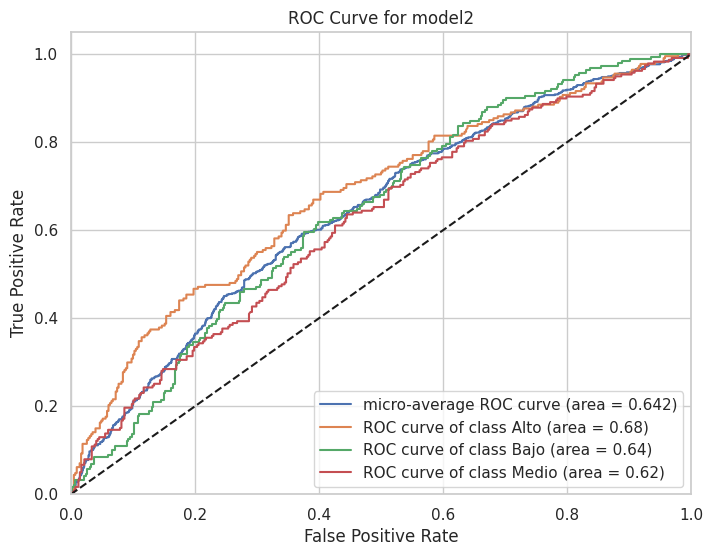

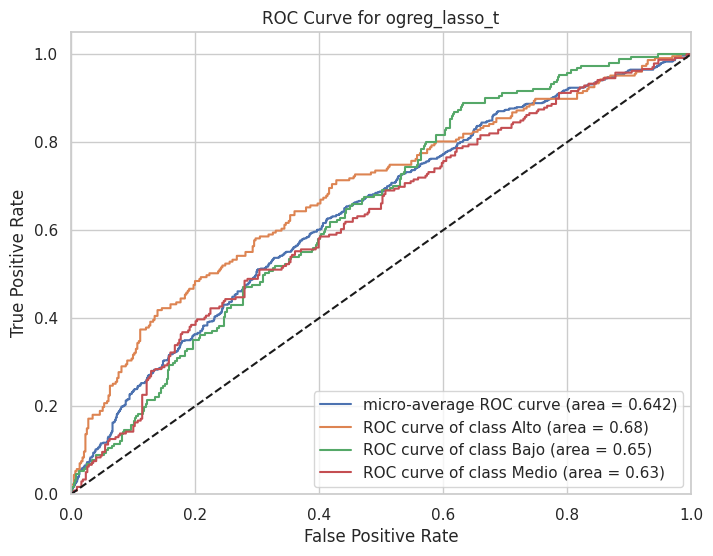

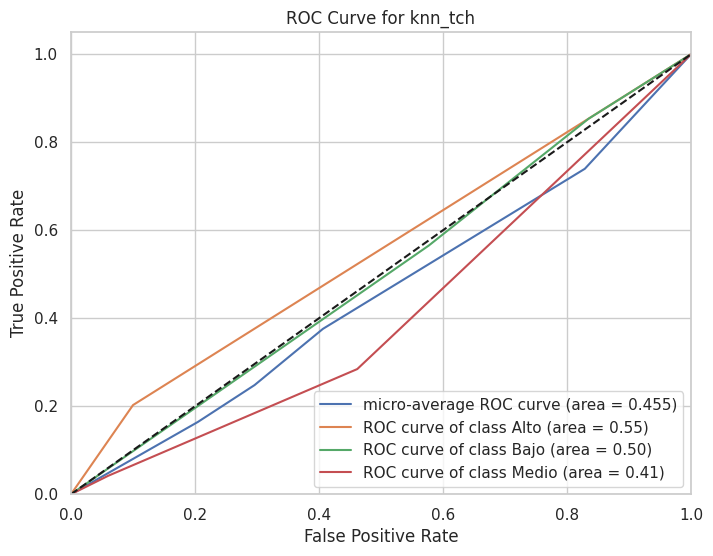

In [79]:
# prompt: curvo roc simple de los tres modelos: model2, ogreg_lasso_t, knn_tch

def plot_roc_curve(model, X_test, y_test, title):
    y_score = model.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.3f})')
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {np.unique(y_test)[i]} (area = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Assuming X_test_scaled_t and y_test_t are for TCH_categoria
plot_roc_curve(model2, X_test_scaled_t, y_test_t, title='ROC Curve for model2')
plot_roc_curve(logreg_lasso_t, X_test_scaled_t, y_test_t, title='ROC Curve for ogreg_lasso_t')

# Assuming X_test_scaled_t is appropriate for knn_tch
plot_roc_curve(knn_tch, X_test_scaled_t, y_test_t, title='ROC Curve for knn_tch')
